### Applying Edge Detection/Texture Analysis to Lesions ###

Corresponding to section 3.3 - investigating how the covered image analysis techniques perform when applied to various images from our dataset.

In [ ]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian, sobel
from skimage.segmentation import active_contour
from skimage import io, color, img_as_ubyte
from tqdm import tqdm
from scipy.stats import skew
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_uint
from matplotlib.gridspec import GridSpec

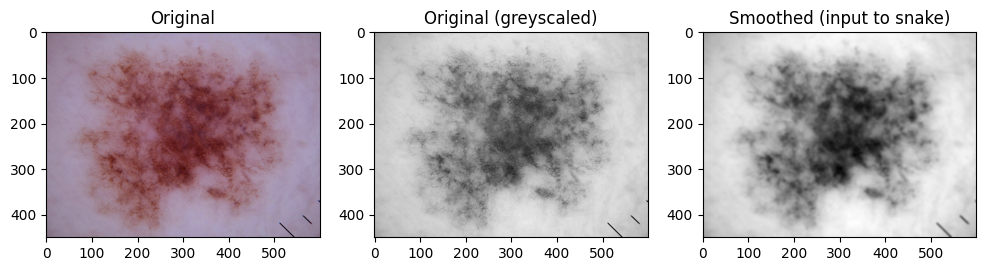

Alpha loop: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


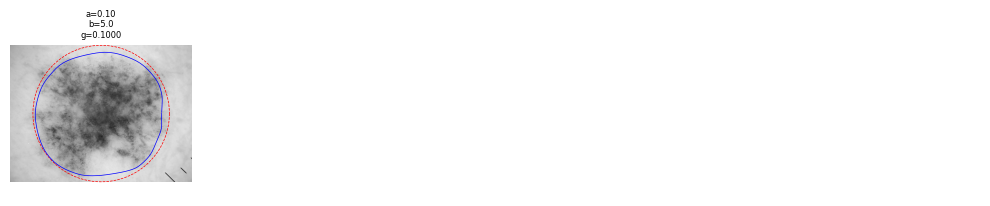

In [ ]:
# MELANOMA 1

# load the image
img_path = "mel_1.jpg"
img_rgb = io.imread(img_path)
img = rgb2gray(img_rgb)

rows, cols = img.shape

# initial circular contour
r_center, c_center = rows * 0.5, cols * 0.5
radius = min(rows, cols) * 0.5
s = np.linspace(0, 2 * np.pi, 400)
r = r_center + radius * np.sin(s)
c = c_center + radius * np.cos(s)

# clip the circle so it stays inside the image
init = np.array([r, c]).T

# parameter ranges
alphas = np.linspace(0.1, 0.1, 1)
betas  = np.linspace(5, 5, 1)
gammas = np.linspace(0.1, 0.1, 1)

# preprocess
smoothed = gaussian(img, sigma=2)
energy = -sobel(smoothed)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(img, cmap='gray'); plt.title("Original (greyscaled)")
plt.subplot(1, 3, 3); plt.imshow(smoothed, cmap='gray'); plt.title("Smoothed (input to snake)")
plt.show()

# store results
results = {}

# triple grid search
for alpha in tqdm(alphas, desc="Alpha loop"):
    for beta in betas:
        for gamma in gammas:

            snake = active_contour(
                smoothed,
                init,
                alpha=alpha,
                beta=beta,
                gamma=gamma,
                w_line=0,
                w_edge=20
            )

            results[(alpha, beta, gamma)] = snake

n = len(results)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for ax, ((alpha, beta, gamma), snake) in zip(axes, results.items()):
    ax.imshow(img, cmap='gray')
    ax.plot(init[:, 1], init[:, 0], '--r', lw=0.5)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=0.5)
    ax.set_title(f"a={alpha:.2f}\nb={beta:.1f}\ng={gamma:.4f}", fontsize=6)
    ax.axis("off")

for i in range(len(results), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

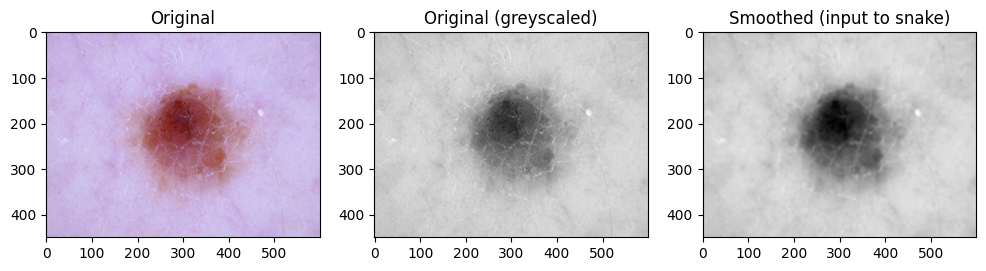

Alpha loop: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


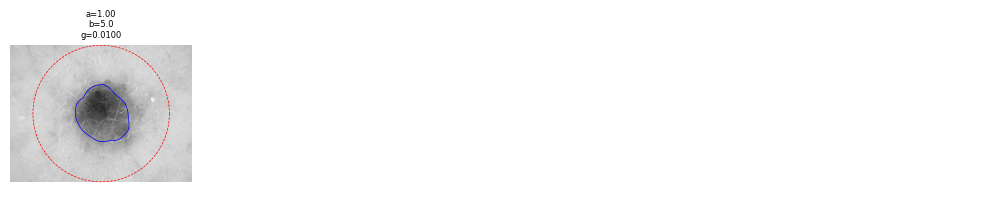

In [ ]:
# MELANOMA 2

# load the image
img_path = "mel_2.jpg"
img_rgb = io.imread(img_path)
img = rgb2gray(img_rgb)

rows, cols = img.shape

# initial circular contour
r_center, c_center = rows * 0.5, cols * 0.5
radius = min(rows, cols) * 0.5
s = np.linspace(0, 2 * np.pi, 400)
r = r_center + radius * np.sin(s)
c = c_center + radius * np.cos(s)

# clip the circle so it stays inside the image
init = np.array([r, c]).T

# parameter ranges
alphas = np.linspace(1, 1, 1)
betas  = np.linspace(5, 5, 1)
gammas = np.linspace(0.01, 0.01, 1)

# preprocess
smoothed = gaussian(img, sigma=2)
energy = -sobel(smoothed)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(img, cmap='gray'); plt.title("Original (greyscaled)")
plt.subplot(1, 3, 3); plt.imshow(smoothed, cmap='gray'); plt.title("Smoothed (input to snake)")
plt.show()

# store results
results = {}

# triple grid search
for alpha in tqdm(alphas, desc="Alpha loop"):
    for beta in betas:
        for gamma in gammas:

            snake = active_contour(
                smoothed,
                init,
                alpha=alpha,
                beta=beta,
                gamma=gamma,
                w_line=0,
                w_edge=20
            )

            results[(alpha, beta, gamma)] = snake

n = len(results)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for ax, ((alpha, beta, gamma), snake) in zip(axes, results.items()):
    ax.imshow(img, cmap='gray')
    ax.plot(init[:, 1], init[:, 0], '--r', lw=0.5)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=0.5)
    ax.set_title(f"a={alpha:.2f}\nb={beta:.1f}\ng={gamma:.4f}", fontsize=6)
    ax.axis("off")

for i in range(len(results), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

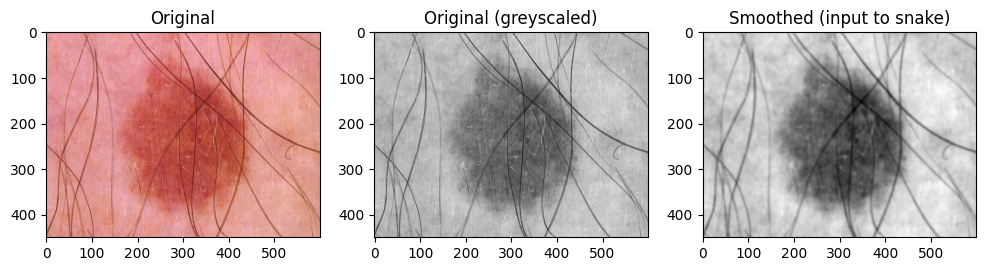

Alpha loop: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


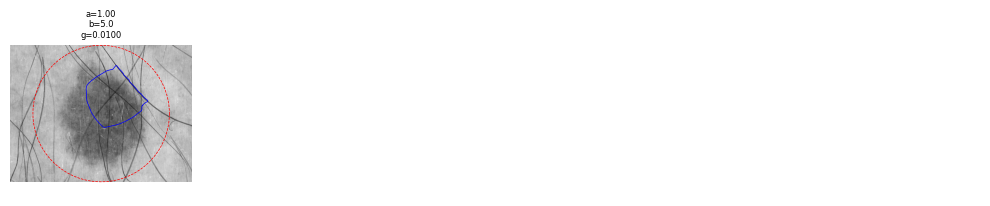

In [ ]:
# NEVUS 1

# load the image
img_path = "nev_1.jpg"
img_rgb = io.imread(img_path)
img = rgb2gray(img_rgb)

rows, cols = img.shape

# initial circular contour
r_center, c_center = rows * 0.5, cols * 0.5
radius = min(rows, cols) * 0.5
s = np.linspace(0, 2 * np.pi, 400)
r = r_center + radius * np.sin(s)
c = c_center + radius * np.cos(s)

# clip the circle so it stays inside the image
init = np.array([r, c]).T

# parameter ranges
alphas = np.linspace(1, 1, 1)
betas  = np.linspace(5, 5, 1)
gammas = np.linspace(0.01, 0.01, 1)

# preprocess
smoothed = gaussian(img, sigma=2)
energy = -sobel(smoothed)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(img, cmap='gray'); plt.title("Original (greyscaled)")
plt.subplot(1, 3, 3); plt.imshow(smoothed, cmap='gray'); plt.title("Smoothed (input to snake)")
plt.show()

# store results
results = {}

# triple grid search
for alpha in tqdm(alphas, desc="Alpha loop"):
    for beta in betas:
        for gamma in gammas:

            snake = active_contour(
                smoothed,
                init,
                alpha=alpha,
                beta=beta,
                gamma=gamma,
                w_line=0,
                w_edge=20
            )

            results[(alpha, beta, gamma)] = snake

n = len(results)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for ax, ((alpha, beta, gamma), snake) in zip(axes, results.items()):
    ax.imshow(img, cmap='gray')
    ax.plot(init[:, 1], init[:, 0], '--r', lw=0.5)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=0.5)
    ax.set_title(f"a={alpha:.2f}\nb={beta:.1f}\ng={gamma:.4f}", fontsize=6)
    ax.axis("off")

for i in range(len(results), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

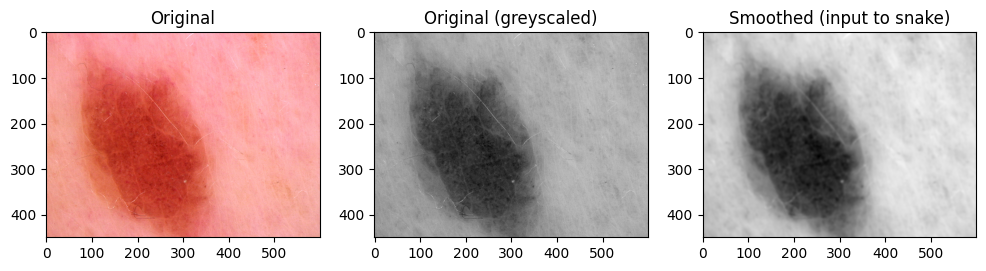

Alpha loop: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


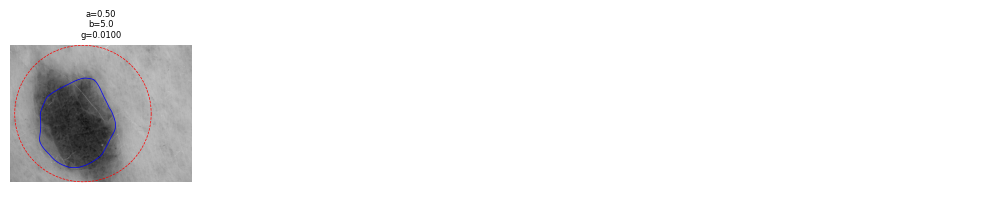

In [ ]:
# NEVUS 2

# load the image
img_path = "nev_2.jpg"
img_rgb = io.imread(img_path)
img = rgb2gray(img_rgb)

rows, cols = img.shape

# initial circular contour
r_center, c_center = rows * 0.5, cols * 0.4
radius = min(rows, cols) * 0.5
s = np.linspace(0, 2 * np.pi, 400)
r = r_center + radius * np.sin(s)
c = c_center + radius * np.cos(s)

# clip the circle so it stays inside the image
init = np.array([r, c]).T

# parameter ranges
alphas = np.linspace(0.5, 0.5, 1)
betas  = np.linspace(5, 5, 1)
gammas = np.linspace(0.01, 0.01, 1)

# preprocess
smoothed = gaussian(img, sigma=2)
energy = -sobel(smoothed)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(img, cmap='gray'); plt.title("Original (greyscaled)")
plt.subplot(1, 3, 3); plt.imshow(smoothed, cmap='gray'); plt.title("Smoothed (input to snake)")
plt.show()

# store results
results = {}

# triple grid search
for alpha in tqdm(alphas, desc="Alpha loop"):
    for beta in betas:
        for gamma in gammas:

            snake = active_contour(
                smoothed,
                init,
                alpha=alpha,
                beta=beta,
                gamma=gamma,
                w_line=0,
                w_edge=20
            )

            results[(alpha, beta, gamma)] = snake

n = len(results)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for ax, ((alpha, beta, gamma), snake) in zip(axes, results.items()):
    ax.imshow(img, cmap='gray')
    ax.plot(init[:, 1], init[:, 0], '--r', lw=0.5)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=0.5)
    ax.set_title(f"a={alpha:.2f}\nb={beta:.1f}\ng={gamma:.4f}", fontsize=6)
    ax.axis("off")

for i in range(len(results), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

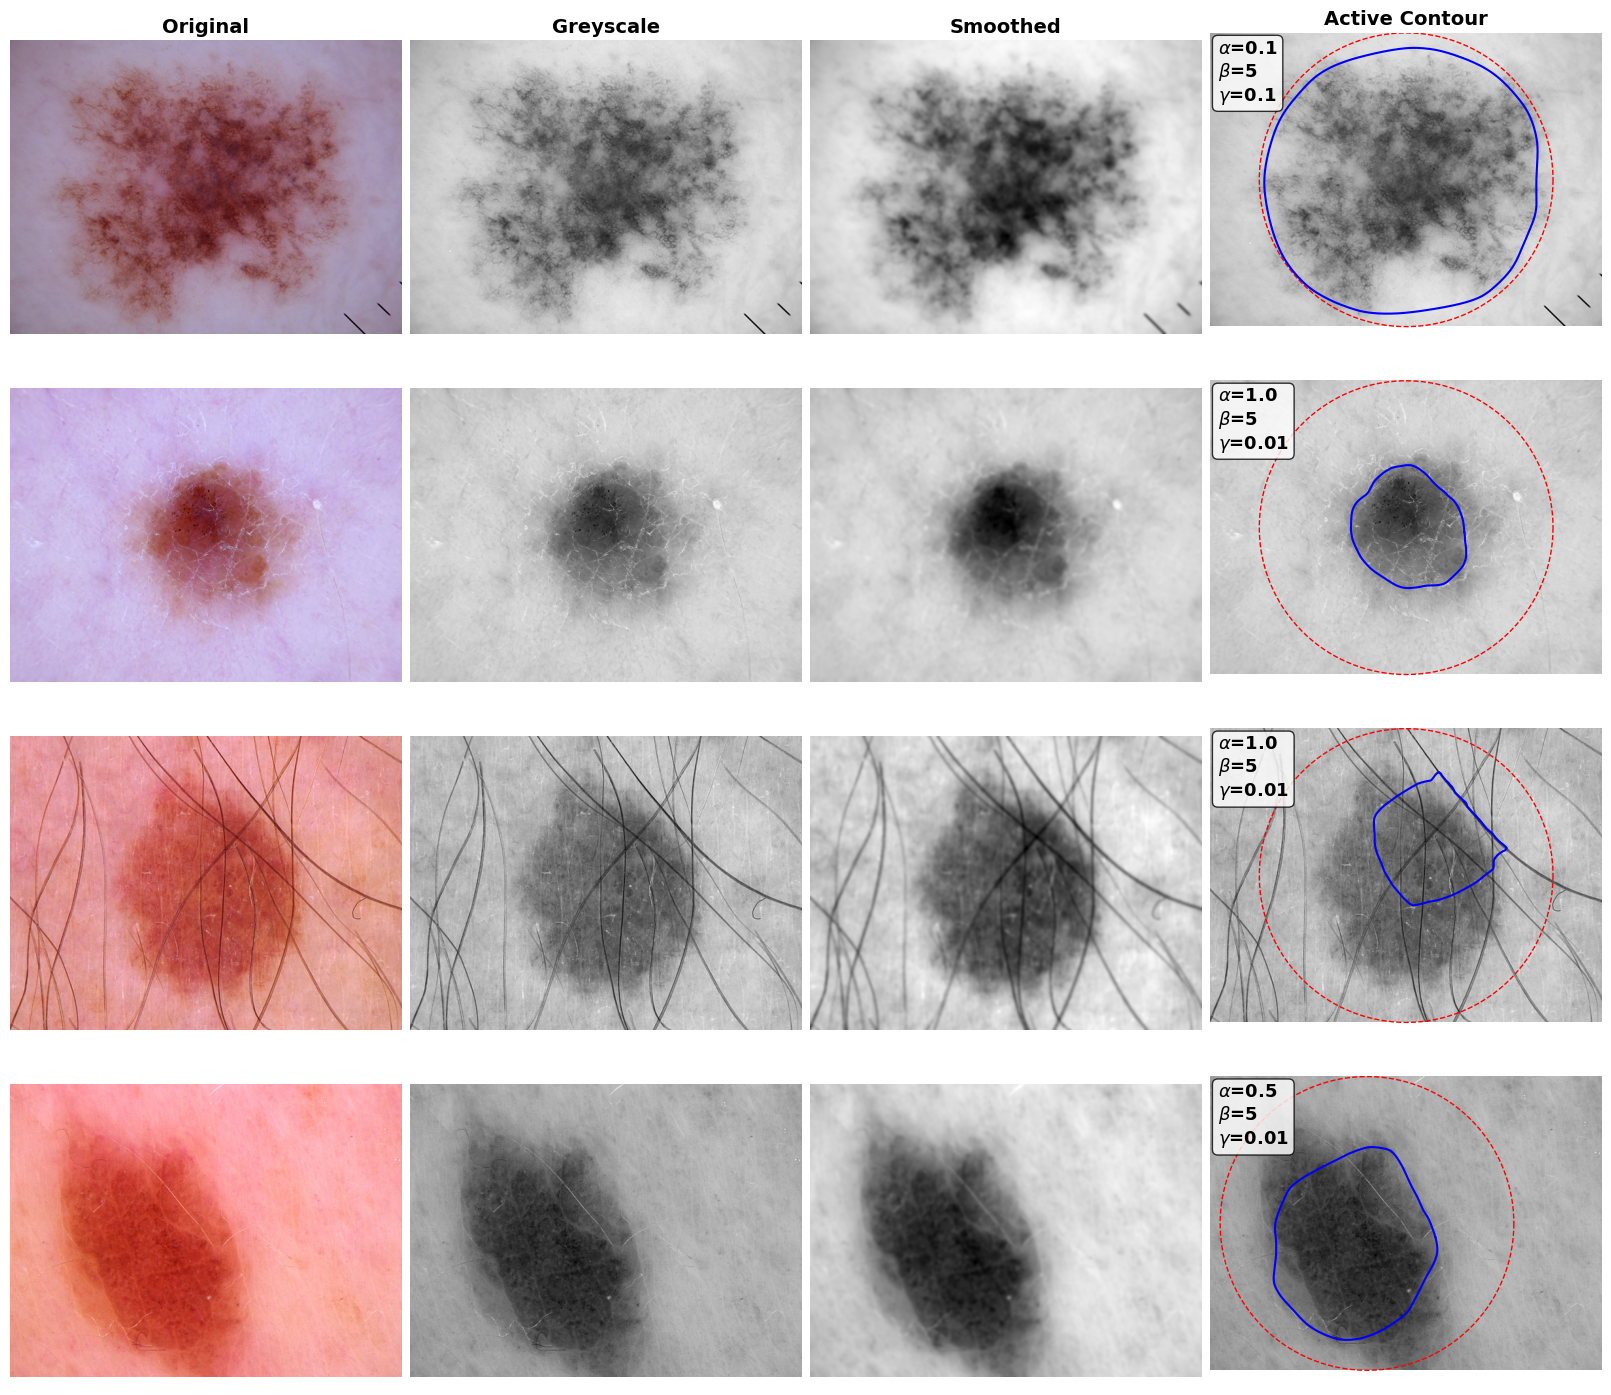

In [ ]:

# helper function to run one active contour for comparison between lesions

def run_snake(img_path, alpha, beta, gamma, center_shift=(0.5, 0.5)):
    img_rgb = io.imread(img_path)
    img_gray = rgb2gray(img_rgb)

    rows, cols = img_gray.shape
    r_center, c_center = rows * center_shift[0], cols * center_shift[1]
    radius = min(rows, cols) * 0.5

    s = np.linspace(0, 2 * np.pi, 400)
    r = r_center + radius * np.sin(s)
    c = c_center + radius * np.cos(s)
    init = np.array([r, c]).T

    smoothed = gaussian(img_gray, sigma=2)

    snake = active_contour(
        smoothed,
        init,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
        w_line=0,
        w_edge=20
    )

    return img_rgb, img_gray, smoothed, init, snake


# experiment definitions
experiments = [
    {
        "title": "Melanoma 1",
        "path": "mel_1.jpg",
        "alpha": 0.1,
        "beta": 5,
        "gamma": 0.1,
        "center": (0.5, 0.5)
    },
    {
        "title": "Melanoma 2",
        "path": "mel_2.jpg",
        "alpha": 1.0,
        "beta": 5,
        "gamma": 0.01,
        "center": (0.5, 0.5)
    },
    {
        "title": "Melanocytic Nevus 1",
        "path": "nev_1.jpg",
        "alpha": 1.0,
        "beta": 5,
        "gamma": 0.01,
        "center": (0.5, 0.5)
    },
    {
        "title": "Melanocytic Nevus 2",
        "path": "nev_2.jpg",
        "alpha": 0.5,
        "beta": 5,
        "gamma": 0.01,
        "center": (0.5, 0.4)
    }
]

# create combined figure
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=(16, 14),
    constrained_layout=True
)

column_titles = ["Original", "Greyscale", "Smoothed", "Active Contour"]

for col, title in enumerate(column_titles):
    axes[0, col].set_title(title, fontsize=14, fontweight="bold")

for row, exp in enumerate(experiments):
    img_rgb, img_gray, smoothed, init, snake = run_snake(
        exp["path"],
        exp["alpha"],
        exp["beta"],
        exp["gamma"],
        exp["center"]
    )

    # original
    axes[row, 0].imshow(img_rgb)
    axes[row, 0].set_ylabel(exp["title"], fontsize=1, fontweight="bold")

    # greyscale
    axes[row, 1].imshow(img_gray, cmap="gray")

    # smoothed
    axes[row, 2].imshow(smoothed, cmap="gray")

    # active contour result
    axes[row, 3].imshow(img_gray, cmap="gray")
    axes[row, 3].plot(init[:, 1], init[:, 0], "--r", lw=1, label="Initial contour")
    axes[row, 3].plot(snake[:, 1], snake[:, 0], "-b", lw=1.5, label="Final contour")

    axes[row, 3].text(
        0.02, 0.98,
        f"$\\alpha$={exp['alpha']}\n$\\beta$={exp['beta']}\n$\\gamma$={exp['gamma']}",
        transform=axes[row, 3].transAxes,
        fontsize=13,
        fontweight="bold",
        va="top",
        ha="left",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
    )

    for col in range(4):
        axes[row, col].axis("off")

plt.show()


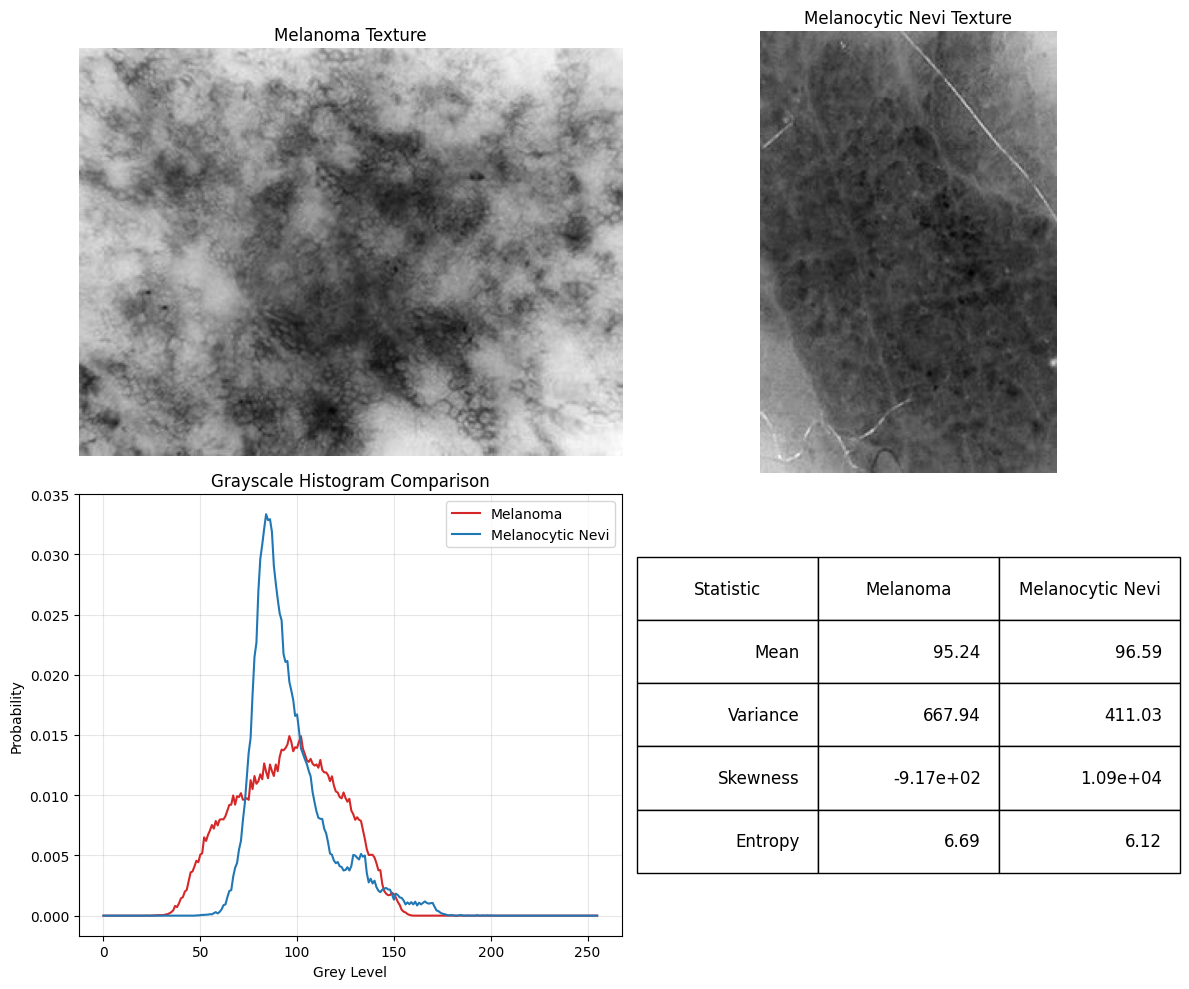

In [ ]:
# side by side histograms and statistics

# more helper functions to improve efficiency

def load_grayscale_image(path):
    """
    load image, convert to grayscale, return uint8 image.
    """
    img = io.imread(path)
    if img.ndim == 3:
        img = color.rgb2gray(img)
    return img_as_ubyte(img)


def histogram_statistics(img, num_levels=256):
    """
    compute histogram-based texture statistics:
    mean, variance, skewness, entropy.
    """
    # histogram
    hist, bin_edges = np.histogram(
        img.flatten(),
        bins=num_levels,
        range=(0, num_levels),
        density=True  # normalised histogram
    )

    z = np.arange(num_levels)

    # mean
    mean = np.sum(z * hist)

    # variance
    variance = np.sum((z - mean) ** 2 * hist)

    # skewness (histogram-based definition)
    skewness = np.sum((z - mean) ** 3 * hist)

    # entropy (avoid log(0))
    hist_nonzero = hist[hist > 0]
    entropy = -np.sum(hist_nonzero * np.log2(hist_nonzero))

    return mean, variance, skewness, entropy, hist

# load images

mel_img = load_grayscale_image("text_mel1.jpg")
nev_img = load_grayscale_image("text_nev2.jpg")

# compute statistics

mel_stats = histogram_statistics(mel_img)
nev_stats = histogram_statistics(nev_img)

# unpack
(mel_mean, mel_var, mel_skew, mel_entropy, mel_hist) = mel_stats
(nev_mean, nev_var, nev_skew, nev_entropy, nev_hist) = nev_stats

# plot for comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# top-left: melanoma image
axes[0, 0].imshow(mel_img, cmap="gray")
axes[0, 0].set_title("Melanoma Texture")
axes[0, 0].axis("off")

# top-right: nevus image
axes[0, 1].imshow(nev_img, cmap="gray")
axes[0, 1].set_title("Melanocytic Nevi Texture")
axes[0, 1].axis("off")

# bottom-left: merged histograms
axes[1, 0].plot(mel_hist, color="tab:red", label="Melanoma")
axes[1, 0].plot(nev_hist, color="tab:blue", label="Melanocytic Nevi")
axes[1, 0].set_title("Grayscale Histogram Comparison")
axes[1, 0].set_xlabel("Grey Level")
axes[1, 0].set_ylabel("Probability")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# bottom-right: statistics table
axes[1, 1].axis("off")

stats_table = [
    ["Mean", f"{mel_mean:.2f}", f"{nev_mean:.2f}"],
    ["Variance", f"{mel_var:.2f}", f"{nev_var:.2f}"],
    ["Skewness", f"{mel_skew:.2e}", f"{nev_skew:.2e}"],
    ["Entropy", f"{mel_entropy:.2f}", f"{nev_entropy:.2f}"],
]

table = axes[1, 1].table(
    cellText=stats_table,
    colLabels=["Statistic", "Melanoma", "Melanocytic Nevi"],
    loc="center"
)

table.scale(1, 3)
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.tight_layout()
plt.show()

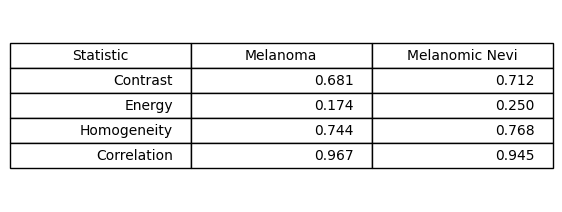

In [ ]:

# 2nd order texture stats

# helper functions
def quantize_image(img, levels=32):
    """
    reduce number of grey levels for stable GLCM computation.
    """
    img_q = (img / (256 / levels)).astype(np.uint8)
    return img_q


def glcm_features(img, levels=32, distance=1):
    """
    compute averaged haralick features from GLCM.
    """
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    glcm = graycomatrix(
        img,
        distances=[distance],
        angles=angles,
        levels=levels,
        symmetric=True,
        normed=True
    )

    features = {
        "Contrast": np.mean(graycoprops(glcm, "contrast")),
        "Energy": np.mean(graycoprops(glcm, "energy")),
        "Homogeneity": np.mean(graycoprops(glcm, "homogeneity")),
        "Correlation": np.mean(graycoprops(glcm, "correlation"))
    }

    return features, glcm


# load and process images
mel = load_grayscale_image("text_mel1.jpg")
nev = load_grayscale_image("text_nev2.jpg")

mel_q = quantize_image(mel)
nev_q = quantize_image(nev)

mel_feats, mel_glcm = glcm_features(mel_q)
nev_feats, nev_glcm = glcm_features(nev_q)

# table of statistics
stats = [
    ["Contrast", mel_feats["Contrast"], nev_feats["Contrast"]],
    ["Energy", mel_feats["Energy"], nev_feats["Energy"]],
    ["Homogeneity", mel_feats["Homogeneity"], nev_feats["Homogeneity"]],
    ["Correlation", mel_feats["Correlation"], nev_feats["Correlation"]],
]

fig, ax = plt.subplots(figsize=(7, 2.5))
ax.axis("off")

table = ax.table(
    cellText=[[s[0], f"{s[1]:.3f}", f"{s[2]:.3f}"] for s in stats],
    colLabels=["Statistic", "Melanoma", "Melanomic Nevi"],
    loc="center"
)

table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()


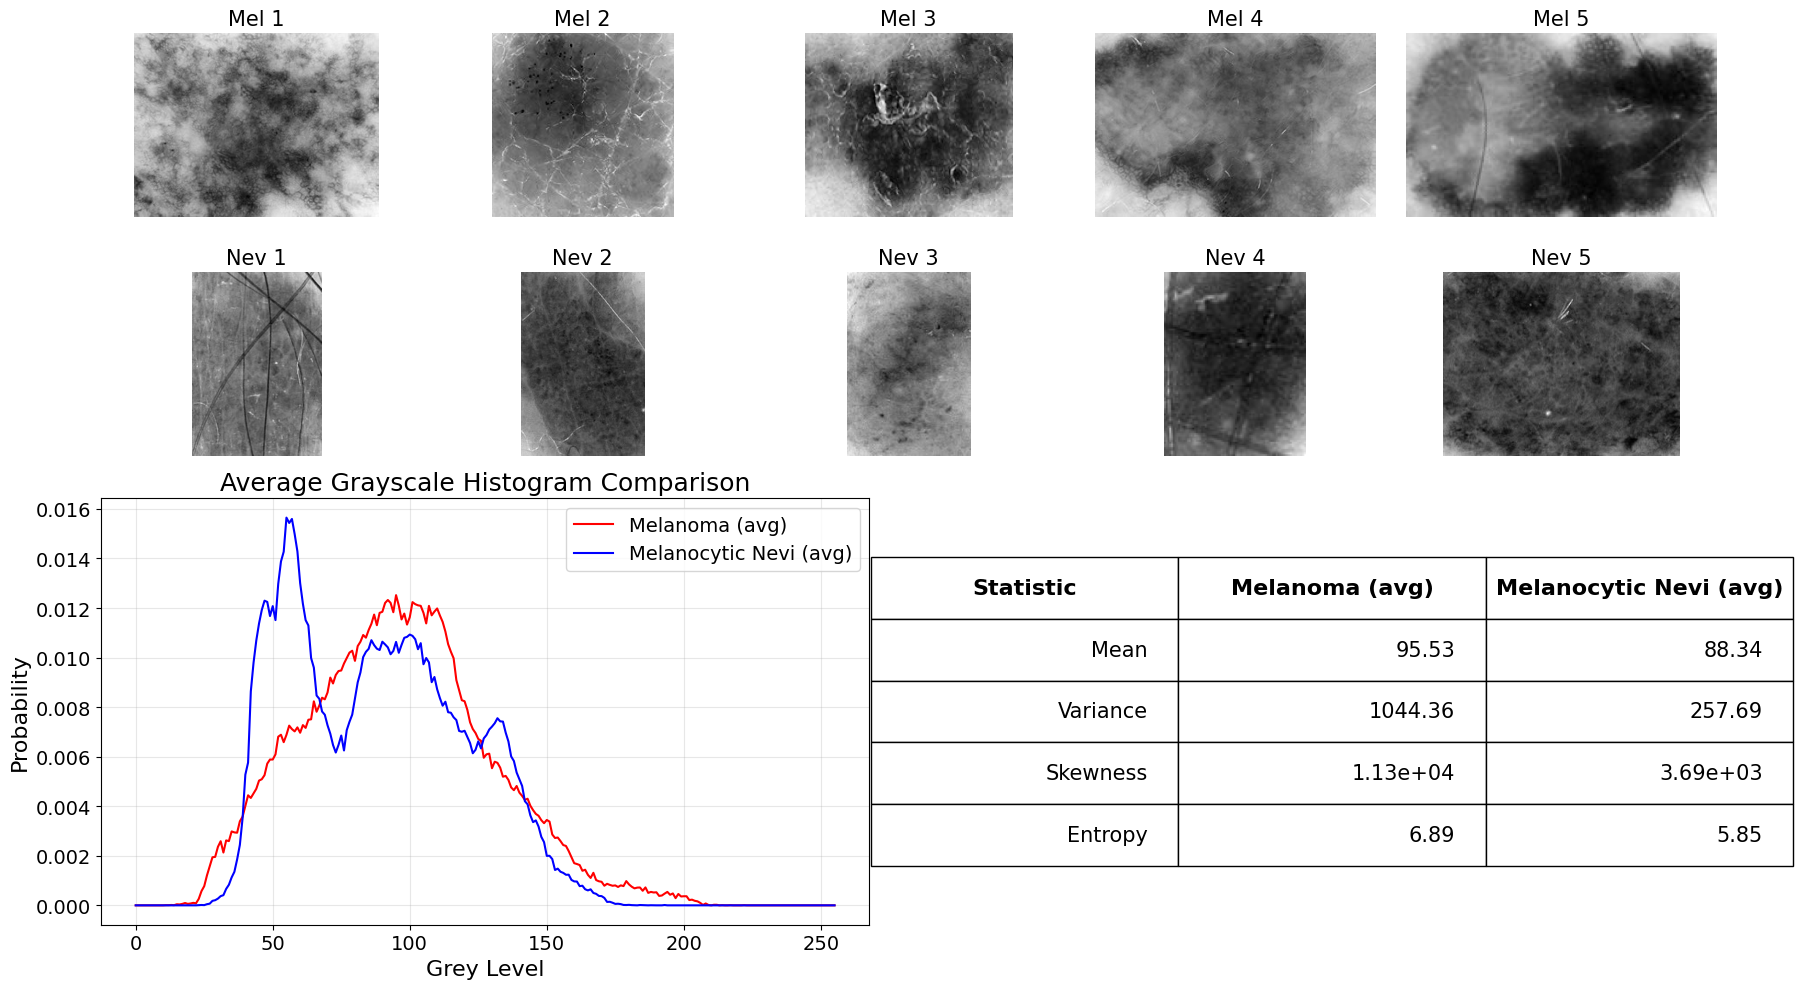

In [ ]:
# load images
num_images = 5

mel_imgs = [load_grayscale_image(f"text_mel{i}.jpg") for i in range(1, num_images + 1)]
nev_imgs = [load_grayscale_image(f"text_nev{i}.jpg") for i in range(1, num_images + 1)]

# compute histograms and statistics
mel_hists, mel_stats = [], []
nev_hists, nev_stats = [], []

for img in mel_imgs:
    mean, var, skew, ent, hist = histogram_statistics(img)
    mel_stats.append([mean, var, skew, ent])
    mel_hists.append(hist)

for img in nev_imgs:
    mean, var, skew, ent, hist = histogram_statistics(img)
    nev_stats.append([mean, var, skew, ent])
    nev_hists.append(hist)

mel_hists = np.array(mel_hists)
nev_hists = np.array(nev_hists)

mel_hist_avg = mel_hists.mean(axis=0)
nev_hist_avg = nev_hists.mean(axis=0)

mel_stats_avg = np.mean(mel_stats, axis=0)
nev_stats_avg = np.mean(nev_stats, axis=0)

# combined figure
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(3, 2, figure=fig, height_ratios=[2.2, 1, 1])

# image grid
gs_img = gs[0, :].subgridspec(2, num_images, wspace=0.05, hspace=0.3)

for i in range(num_images):
    ax = fig.add_subplot(gs_img[0, i])
    ax.imshow(mel_imgs[i], cmap="gray")
    ax.set_title(f"Mel {i+1}", fontsize=15)
    ax.axis("off")

    ax = fig.add_subplot(gs_img[1, i])
    ax.imshow(nev_imgs[i], cmap="gray")
    ax.set_title(f"Nev {i+1}", fontsize=15)
    ax.axis("off")

# average histogram plot
ax_hist = fig.add_subplot(gs[1:, 0])

ax_hist.plot(mel_hist_avg, label="Melanoma (avg)", color="red")
ax_hist.plot(nev_hist_avg, label="Melanocytic Nevi (avg)", color="blue")

ax_hist.set_xlabel("Grey Level", fontsize=16)
ax_hist.set_ylabel("Probability", fontsize=16)
ax_hist.set_title("Average Grayscale Histogram Comparison", fontsize=18)

ax_hist.tick_params(axis="both", labelsize=14)
ax_hist.legend(fontsize=14)
ax_hist.grid(alpha=0.3)

# summary stats table
ax_table = fig.add_subplot(gs[1:, 1])
ax_table.axis("off")

stats_table = [
    ["Mean", f"{mel_stats_avg[0]:.2f}", f"{nev_stats_avg[0]:.2f}"],
    ["Variance", f"{mel_stats_avg[1]:.2f}", f"{nev_stats_avg[1]:.2f}"],
    ["Skewness", f"{mel_stats_avg[2]:.2e}", f"{nev_stats_avg[2]:.2e}"],
    ["Entropy", f"{mel_stats_avg[3]:.2f}", f"{nev_stats_avg[3]:.2f}"],
]

table = ax_table.table(
    cellText=stats_table,
    colLabels=["Statistic", "Melanoma (avg)", "Melanocytic Nevi (avg)"],
    loc="center"
)

table.scale(1.2, 3.2)
table.auto_set_font_size(False)
table.set_fontsize(15)

for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(fontsize=16, weight="bold")

plt.tight_layout()
plt.show()


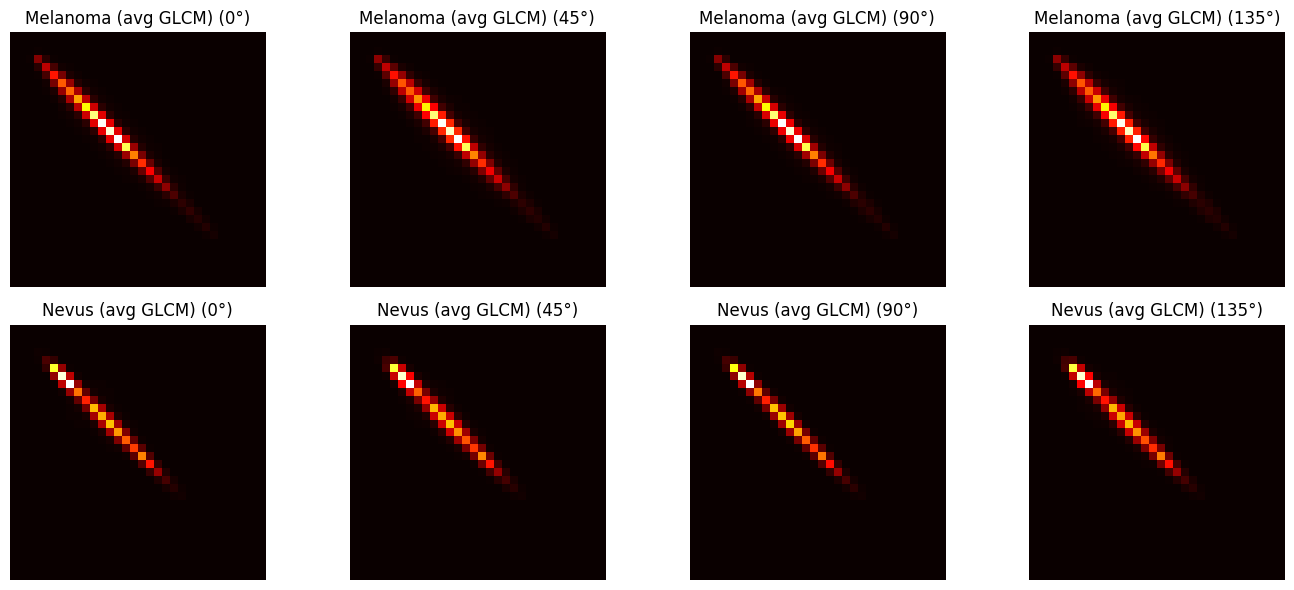

In [ ]:
# make helper function to compute GLCMs for a list of images
def compute_glcms(image_paths, 
                  distances=[1], 
                  angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                  levels=32):
    """
    compute GLCMs for a list of images.

    returns:
        list of GLCMs with shape (levels, levels, len(distances), len(angles))
    """

    glcms = []

    for path in image_paths:
        img = load_grayscale_image(path)

        # reduce grey levels for numerical stability
        img_quantised = (img / (256 / levels)).astype(np.uint8)

        glcm = graycomatrix(
            img_quantised,
            distances=distances,
            angles=angles,
            levels=levels,
            symmetric=True,
            normed=True
        )

        glcms.append(glcm)

    return glcms

num_images = 5

mel_paths = [f"text_mel{i}.jpg" for i in range(1, num_images + 1)]
nev_paths = [f"text_nev{i}.jpg" for i in range(1, num_images + 1)]

mel_glcms = compute_glcms(mel_paths)
nev_glcms = compute_glcms(nev_paths)



def plot_avg_glcm_comparison(mel_glcms, nev_glcms):
    """
    plot averaged GLCM heatmaps for melanoma and nevus.
    expected input: lists or arrays of GLCMs with shape (L, L, 1, 4).
    """

    angles = ["0°", "45°", "90°", "135°"]
    titles = ["Melanoma (avg GLCM)", "Nevus (avg GLCM)"]

    # stack and average
    mel_glcms = np.stack(mel_glcms, axis=0)
    nev_glcms = np.stack(nev_glcms, axis=0)

    mel_glcm_avg = mel_glcms.mean(axis=0)
    nev_glcm_avg = nev_glcms.mean(axis=0)

    fig, axes = plt.subplots(2, 4, figsize=(14, 6))

    # top row: melanoma
    for i in range(4):
        im = axes[0, i].imshow(
            mel_glcm_avg[:, :, 0, i],
            cmap="hot"
        )
        axes[0, i].set_title(f"{titles[0]} ({angles[i]})")
        axes[0, i].axis("off")

    # bottom row: melanocytic nevi
    for i in range(4):
        axes[1, i].imshow(
            nev_glcm_avg[:, :, 0, i],
            cmap="hot"
        )
        axes[1, i].set_title(f"{titles[1]} ({angles[i]})")
        axes[1, i].axis("off")

    plt.tight_layout()
    plt.show()

plot_avg_glcm_comparison(mel_glcms, nev_glcms)
